## Observations and Insights 

In [1]:
# Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
#import seaborn as sns


# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
overall_mouse_data_df = pd.merge(study_results, mouse_metadata,
                                 how='outer', on='Mouse ID')

# Display the data table for preview
#mouse_metadata.count()
#study_results.count()
overall_mouse_data_df.head(12)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
5,b128,25,43.262145,1,Capomulin,Female,9,22
6,b128,30,40.605335,1,Capomulin,Female,9,22
7,b128,35,37.967644,1,Capomulin,Female,9,22
8,b128,40,38.379726,2,Capomulin,Female,9,22
9,b128,45,38.982878,2,Capomulin,Female,9,22


In [2]:
#General Info
#overall_mouse_data_df.dtypes

In [3]:
# Cleaning Data - Checking for overall mouse count
mouse_count_df = overall_mouse_data_df.count()
#mouse_count_df

In [4]:
#Todo:  Find the duplicate mouse id

In [5]:
# Cleaning Data - Dropped the duplicate mouse data.
mouse_data_nodupes_df= overall_mouse_data_df.drop_duplicates(subset=['Mouse ID','Timepoint'])
mouse_data_nodupes_df.count()

Mouse ID              1888
Timepoint             1888
Tumor Volume (mm3)    1888
Metastatic Sites      1888
Drug Regimen          1888
Sex                   1888
Age_months            1888
Weight (g)            1888
dtype: int64

## Summary Statistics

In [6]:
#Drug Statistics - Finding the Mean, Median, Variance, Standard Deviation and SEM by tumor volume - Version 1

#mouse_data_nodupes_df.groupby('Drug Regimen', as_index = True)["Tumor Volume (mm3)"].describe()
var_stat= mouse_data_nodupes_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].var()
med_stat= mouse_data_nodupes_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].median()
std_stat= mouse_data_nodupes_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].std()
men_stat= mouse_data_nodupes_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].mean()
sem_stat= mouse_data_nodupes_df.groupby('Drug Regimen')["Tumor Volume (mm3)"].sem()

#stats_df
#var_stat
#med_stat
#std_stat
#men_stat
#sem_stat

drug_stat_df = pd.DataFrame({"Variance":var_stat, "Median": med_stat, "Mean": men_stat, "Standard Dev": std_stat, "SEM": sem_stat})
drug_stat_df

,Variance,Median,Mean,Standard Dev,SEM
Drug Regimen,,,,,
Capomulin,24.947764,41.557809,40.675741,4.994774,0.329346
Ceftamin,39.290177,51.776157,52.591172,6.268188,0.469821
Infubinol,43.128684,51.820584,52.884795,6.567243,0.492236
Ketapril,68.553577,53.698743,55.235638,8.279709,0.603860
Naftisol,66.173479,52.509285,54.331565,8.134708,0.596466
Placebo,61.168083,52.288934,54.033581,7.821003,0.581331
Propriva,43.138803,50.909965,52.393463,6.568014,0.525862
Ramicane,23.486704,40.673236,40.216745,4.846308,0.320955
Stelasyn,59.450562,52.431737,54.233149,7.710419,0.573111


In [7]:
##Drug Statistics - Finding the Mean, Median, Variance, Standard Deviation and SEM by tumor volume - Version 2
 
#Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function

drug_stat_v2_df = mouse_data_nodupes_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
#drug_stat_v2_df

## Bar and Pie Charts

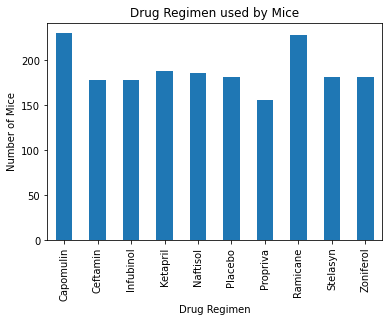

In [8]:
# Bar Chart - Count of Mice Using Drug Regimen - with Pandas Dataframe
users_df = mouse_data_nodupes_df.groupby("Drug Regimen")["Mouse ID"].count()

#x_axis = mouse_data_nodupes_df.np.arange(len("Drug Regimen"))

#plt.bar(x_axis, users, color='r', alpha=0.5, align="center"
users_df.plot(kind="bar")
plt.title("Drug Regimen used by Mice")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
#users2_df= mouse_data_nodupes_df.plot(mouse_data_nodupes_df['Drug Regimen'], kind='bar' , legend=None)
plt.show()

NameError: name 'drug_regemin' is not defined

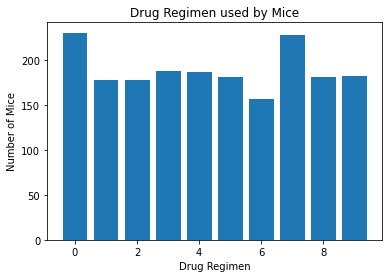

In [9]:
reset_user_df= users_df.reset_index()
x_data = range(len(reset_user_df["Mouse ID"]))
y_data = reset_user_df["Mouse ID"]
plt.bar(x_data, y_data)
plt.title("Drug Regimen used by Mice")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.xticks(x_data, drug_regemin)
#users2_df= mouse_data_nodupes_df.plot(mouse_data_nodupes_df['Drug Regimen'], kind='bar' , legend=None)
plt.show()

In [10]:
#x_data = mouse_data_nodupes_df['Drug Regimen']
#data = mouse_data_nodupes_df['Mouse ID'].count()

#x_data
#data
#plot.bar(x_data,data); plt.xticks(x,('Drug Regimen'))

NameError: name 'drug_regemin' is not defined

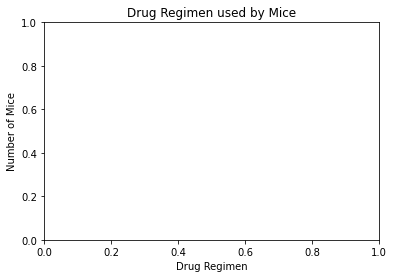

In [11]:
# Bar Chart - Count of Mice Using Drug Regimen - with Matplotlib 
#users_df = mouse_data_nodupes_df.groupby("Drug Regimen")["Mouse ID"].count()
#drug_regemin = mouse_data_nodupes_df["Drug Regimen"].unique()
#number_of_mice = mouse_data_nodupes_df.groupby("Drug Regimen")["Mouse ID"].count()
#number_of_mice=[230,9,5,2,1,4,4,4,2,8]
#x_axis = np.arange(0, len('drug_regemin'))
#tick_location = []
#for x in x_axis:
 #   tick_location.append(x)


plt.title("Drug Regimen used by Mice")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

plt.xlim(-0.75, len(drug_regemin)-.25)
plt.ylim(0, 200)

plt.bar(number_of_mice, drug_regemin, facecolor="blue", alpha=0.75, align="center")
#tick_location = [value for value in drug_regemin]
#plt.xticks(drug_regemin, tick_location)
plt.show()
#Todo:  Passing in the drugs and counts as lists.  


In [12]:
number_of_mice = mouse_data_nodupes_df.groupby("Drug Regimen")["Mouse ID"].count()
number_of_mice

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     156
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

In [13]:
plt.bar(x_axis, number_of_mice, color='b', alpha = 1, align = 'center')

plt.title("Drug Regimen used by Mice")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

NameError: name 'x_axis' is not defined

In [14]:
plt.xticks(x_axis, drug_regemin)

#plt.bar(x_axis, drug_regemin)


NameError: name 'x_axis' is not defined

In [15]:
#Pie Chart - Sex of Mouse in Study - with Pandas Dataframe
gender_of_mice = mouse_data_nodupes_df["Sex"].value_counts()
gender_of_mice_df = pd.DataFrame(gender_of_mice)
gender_of_mice_df['Gender_pct'] = (gender_of_mice_df.Sex / (gender_of_mice_df.Sex.sum()/100)).round(decimals=2)
renamed_genders_of_mice_df = gender_of_mice_df.rename(columns={"Sex":"Total Count", "Gender_pct":"Percentage of Mice"})
def format(x):
    return "{:.2f}%".format(x)
renamed_genders_of_mice_df['Percentage of Mice'] = renamed_genders_of_mice_df['Percentage of Mice'].apply(format)
renamed_genders_of_mice_df


,Total Count,Percentage of Mice
Male,958,50.74%
Female,930,49.26%


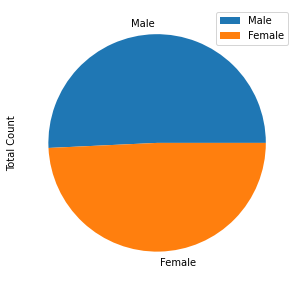

In [16]:
#Pie Chart - Sex of Mouse in Study - with Pandas Dataframe
#renamed_genders_of_mice_df.plot(kind="pie")
plot=renamed_genders_of_mice_df.plot.pie(y='Total Count', figsize=(5, 5))
#plt.show()

([<matplotlib.patches.Wedge at 0x1fdd854f160>,
 [Text(-0.7265028750894215, -0.8259501029038041, 'Female'),
  Text(0.7265029524204479, 0.8259500348836922, 'Male')],
 [Text(-0.3962742955033208, -0.45051823794752943, '49.3%'),
  Text(0.39627433768388065, 0.4505182008456502, '50.7%')])

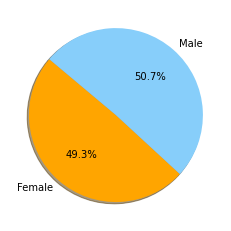

In [17]:
#Pie Chart - Sex of Mouse in Study - with Matplotlib Plot 
user_counts = mouse_data_nodupes_df.groupby('Sex')['Mouse ID'].count().reset_index()
users = user_counts
label = user_counts["Sex"]
colors = ["orange", "lightskyblue"]
explode = (0.1, 0, 0, 0)
#x_axis = mouse_data_nodupes_df.np.arange(len("Drug Regimen"))
# Tells matplotlib to seperate the "Humans" section from the others

plt.pie(users["Mouse ID"], labels=label, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
#users = mouse_data_nodupes_df.("Mouse ID").count
#x_axis = mouse_data_nodupes_df.np.arange(len("Drug Regimen"))

#plt.bar(x_axis, users, color='r', alpha=0.5, align="center")


In [18]:
user_counts.head()

,Sex,Mouse ID
0,Female,930
1,Male,958


ValueError: could not convert string to float: 'Female'

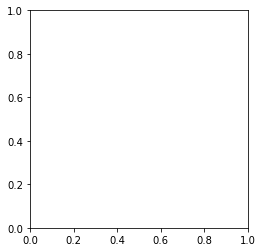

In [19]:
#Pie Chart - Sex of Mouse in Study - with Matplotlib Plot 
#sex = mouse_data_nodupes_df.groupby(["Sex"])
sex = mouse_data_nodupes_df.groupby(["Sex"])

# The values of each section of the pie chart
sizes = mouse_data_nodupes_df["Sex"].count()

# The colors of each section of the pie chart
colors = ["red", "blue"]
explode = (0.1, 0)  
plt.pie(sex, labels=sizes, explode=explode, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("Treatment Impact by Sex")
#plt.show()

## Quartiles, Outliers and Boxplots

In [36]:
#sort least to most and pick the last.

mouse_data_nodupes_df= mouse_data_nodupes_df.sort_values("Timepoint")
last_timepoints_df = mouse_data_nodupes_df.groupby("Mouse ID").last()
Capomulin_df = last_timepoints_df[last_timepoints_df["Drug Regimen"] == "Capomulin"]
#Capomulin_df

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,
b128,45,38.982878,2,Capomulin,Female,9,22
b742,45,38.939633,0,Capomulin,Male,7,21
f966,20,30.485985,0,Capomulin,Male,16,17
g288,45,37.074024,1,Capomulin,Male,3,19
g316,45,40.159220,2,Capomulin,Female,22,22
i557,45,47.685963,1,Capomulin,Female,1,24
i738,45,37.311846,2,Capomulin,Female,23,20
j119,45,38.125164,1,Capomulin,Female,7,23
j246,35,38.753265,1,Capomulin,Female,21,21


In [37]:
Ramicane_df = last_timepoints_df[last_timepoints_df["Drug Regimen"] == "Ramicane"]
#Ramicane_df

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,
a411,45,38.407618,1,Ramicane,Male,3,22
a444,45,43.047543,0,Ramicane,Female,10,25
a520,45,38.810366,1,Ramicane,Male,13,21
a644,45,32.978522,1,Ramicane,Female,7,17
c458,30,38.342008,2,Ramicane,Female,23,20
c758,45,33.397653,1,Ramicane,Male,9,17
d251,45,37.311236,2,Ramicane,Female,8,19
e662,45,40.659006,2,Ramicane,Male,8,24
g791,45,29.128472,1,Ramicane,Male,11,16


In [38]:
Infubinol_df = last_timepoints_df[last_timepoints_df["Drug Regimen"] == "Infubinol"]
#Infubinol_df

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
Mouse ID,,,,,,,
a203,45,67.973419,2,Infubinol,Female,20,23
a251,45,65.525743,1,Infubinol,Female,21,25
a577,30,57.031862,2,Infubinol,Female,6,25
a685,45,66.083066,3,Infubinol,Male,8,30
c139,45,72.226731,2,Infubinol,Male,11,28
c326,5,36.321346,0,Infubinol,Female,18,25
c895,30,60.969711,2,Infubinol,Female,7,29
e476,45,62.435404,1,Infubinol,Male,23,26
f345,45,60.918767,1,Infubinol,Male,23,26


In [40]:
Placebo_df = last_timepoints_df[last_timepoints_df["Drug Regimen"] == "Placebo"]
#Placebo_df

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  

#forlabel, row in df.iterrows():

#create a list of the four drugs we care about
drug_list=['Capomulin','Ramicane','Infubinol', 'Placebo']

#loop through each of the four drugs

for drug in drug_list:

    #Create a small dataframe of ONE drug off of our main dataframe
    drug_list_df = mouse_data_nodupes_df[mouse_data_nodupes_df['Drug Regimen'] == drug]

    #group the mice togeteher within the small dataframe
    grouped = drug_list_df.groupby('Mouse ID')

    #loop through the groups of mice
    for name, group in grouped:    
        max_value=group['Timepoint'].argmax()
        tumor_vol =group.iloc[max_value]['Tumor Volume (mm3)']
        mouse_id=group.iloc[max_value]['Mouse ID']
        print ((drug), (mouse_id),  (tumor_vol))

#Initial code for finding the desired data from one mouse
#b128_df = mouse_data_nodupes_df.loc[mouse_data_nodupes_df['Mouse ID'] == 'g107']
#max_value=b128_df['Timepoint'].argmax()
#tumor_vol =b128_df.iloc[max_value]['Tumor Volume (mm3)']
#tumor_vol
#b128_df

# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
# Have the data in a dataframe of what I need.  Don't need to merge back into dataframe

In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

Reference - Matplotlib - Day 3 - Activity 6 and 7 - For correlation examples
Reference - Matplotlib - Day 3 - Activity 8 for REgression


Regression Line Example from Activity 8:  
x_values = housing_data['RM']
y_values = housing_data['MEDV']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Rooms in House')
plt.ylabel('Median House Prices ($1000)')
plt.show()

Correlation - Formula - example from Activity 6:
Correlation Example:
government = who_data.iloc[:,5]
life = who_data.iloc[:,7]
correlation = st.pearsonr(government,life)
plt.scatter(government,life)
plt.xlabel('% Government Expenditure on Health')
plt.ylabel('Male Life Expectancy')
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
